# Music Recommender Data Cleaning & EDA

### Import Libraries, Data

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
music_df = pd.read_csv('./data/clean/music_df.csv', index_col=0)

In [63]:
music_df.shape

(257470, 10)

In [64]:
music_df.head(1)

,user_id,amazon-id,content,score,summary,genre,title,artist,first-release-year,related
0,A1OFY4ATO7D13W,0026197898,Buy this album. Now. Don't worry about the re...,5,PITCHFORK Eat your heart out!,Alternative Rock,Southern Fashion,The Sudden Passion,2012.0,NaN


### Data Description

In [65]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257470 entries, 0 to 263524
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             257470 non-null  object 
 1   amazon-id           257470 non-null  object 
 2   content             257452 non-null  object 
 3   score               257470 non-null  int64  
 4   summary             257466 non-null  object 
 5   genre               257470 non-null  object 
 6   title               257467 non-null  object 
 7   artist              257470 non-null  object 
 8   first-release-year  139480 non-null  float64
 9   related             212037 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 21.6+ MB


In [66]:
music_df.isnull().sum()

user_id                    0
amazon-id                  0
content                   18
score                      0
summary                    4
genre                      0
title                      3
artist                     0
first-release-year    117990
related                45433
dtype: int64

In [67]:
#drop duplicates
music_df.dropna(subset=['content'], inplace=True)
music_df.dropna(subset=['title'], inplace=True)

### Scores

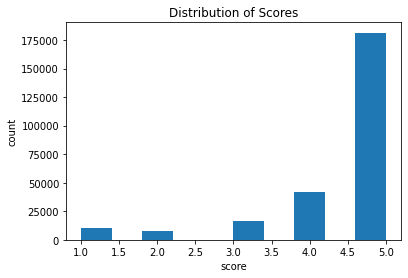

In [68]:
plt.figure(figsize=(6, 4))
plt.hist(music_df['score'])
plt.title('Distribution of Scores')
plt.xlabel('score')
plt.ylabel('count');
#imbalanced, skewed to the left

### Genres

In [69]:
music_df['genre'].value_counts()

Pop                   87127
Rock                  40662
Classical             30900
Latin Music           18058
Jazz                  13759
Dance & Electronic    12922
New Age               10033
Country                9281
Alternative Rock       7823
Folk                   5748
Rap & Hip-Hop          5329
Metal                  5203
R&B                    4824
Blues                  2383
Gospel                 2317
Reggae                 1080
Name: genre, dtype: int64

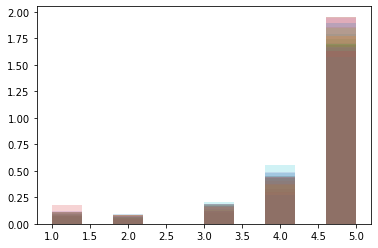

In [71]:
genres = music_df.groupby('genre')['score']
for genre in genres:
    plt.hist(genre[1], bins=10, alpha=0.2, density=True)
#no one genre stands out for amount of ratings

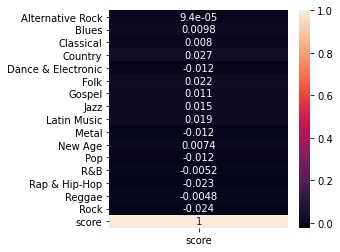

In [72]:
genre_df = pd.get_dummies(music_df['genre'])
genre_df['score'] = music_df['score']

plt.figure(figsize = (4, 4))
sns.heatmap(genre_df.corr()[["score"]], annot=True);
#not much correlation between genres and scores

### Reviews (content)

In [74]:
# Review length
music_df['review_length'] = [len(i) for i in music_df['content']]
music_df['review_word_count'] = music_df['content'].str.split().apply(len)

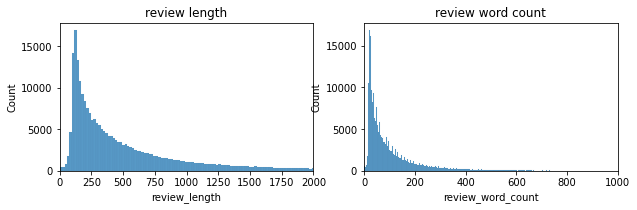

In [75]:
fig = plt.figure(figsize = (10, 6))

ax = fig.add_subplot(2, 2, 1)
sns.histplot(music_df['review_length'], ax=ax)
plt.title('review length')
plt.xlim([0, 2000])

ax = fig.add_subplot(2, 2, 2)
sns.histplot(music_df['review_word_count'], ax=ax)
plt.title('review word count')
plt.xlim([0, 1000]);

In [55]:
#both review length and review word count are skewed to the right

In [76]:
music_df['review_word_count'].nlargest(3)

92003    5882
1267     4698
60909    4378
Name: review_word_count, dtype: int64

In [77]:
music_df.loc[music_df['review_word_count'] > 3000][:2]

,user_id,amazon-id,content,score,summary,genre,title,artist,first-release-year,related,review_length,review_word_count
1267,A2BMDY4WJIDGG7,1858705231,The long awaited new Rush album is finally her...,5,Rush embark on uncharted territories with a co...,Rock,Clockwork Angels: UK Fan Pack,Rush,NaN,"{'also_bought': ['B000NVIXFK', 'B00E9P959O', '...",26775,4698
24180,APPV1ZDETO7B,B000002UAB,This review goes hand in hand with my review o...,5,"A ""Different"" Review for a Novice Generation",Rock,With the Beatles,The Beatles,1963.0,"{'also_bought': ['B0025KVLRO', 'B0025KVLSI', '...",16975,3015


### Word Counts, Bigrams, Trigrams

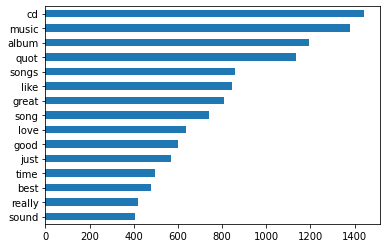

In [78]:
#most common words
cvect = CountVectorizer(stop_words='english')
words = music_df['content'].sample(n=2000)
words_vect = cvect.fit_transform(words)
words_df = pd.DataFrame(words_vect.toarray(), columns=cvect.get_feature_names())
words_df.sum().sort_values(ascending=False).head(15).plot(kind='barh').invert_yaxis();

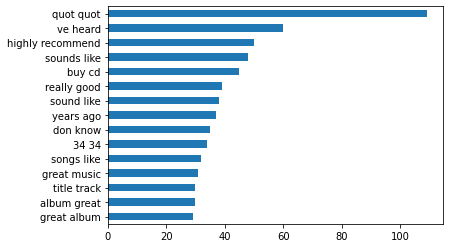

In [79]:
#most common bigrams
#note this is from sample of data due to large vector size
cvect_bigrams = CountVectorizer(ngram_range = (2, 2), stop_words='english')
words = music_df['content'].sample(n=2000)
words_vect_bigrams = cvect_bigrams.fit_transform(words)
words_vect_bigrams_df = pd.DataFrame(words_vect_bigrams.toarray(), columns=cvect_bigrams.get_feature_names())
words_vect_bigrams_df.sum().sort_values(ascending=False).head(15).plot(kind='barh').invert_yaxis();

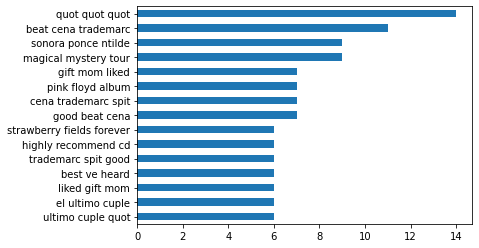

In [80]:
#most common trigrams
#note this is from sample of data due to large vector size
cvect_trigrams = CountVectorizer(ngram_range = (3, 3), stop_words='english')
words = music_df['content'].sample(n=2000)
words_vect_trigrams = cvect_trigrams.fit_transform(words)
words_vect_trigrams_df = pd.DataFrame(words_vect_trigrams.toarray(), columns=cvect_trigrams.get_feature_names())
words_vect_trigrams_df.sum().sort_values(ascending=False).head(15).plot(kind='barh').invert_yaxis();